In [192]:
from typing import Any
from networkx import Graph

import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "I"])
G.add_edges_from(
    [
        ("A", "C", {"weight": 10}),
        ("A", "I", {"weight": 5}),
        ("C", "B", {"weight": 20}),
        ("C", "E", {"weight": 15}),
        ("C", "D", {"weight": 30}),
        ("B", "E", {"weight": 25}),
        ("I", "E", {"weight": 40}),
        ("E", "F", {"weight": 35}),
        ("F", "G", {"weight": 50}),
        ("G", "E", {"weight": 45}),
    ]
)

edge_labels = {(a, b): c["weight"] for a, b, c in G.edges(data=True)}
pos = nx.planar_layout(G)

draw_params = {
    "with_labels": True,
    "edge_color": "gray",
    "width": 3,
    "linewidths": 3,
    "edgecolors": "gray",
    "node_color": "white",
    "node_size": 1000,
    "font_color": "black",
    "font_family": "monospace",
    "font_weight": "bold",
}


def draw_compared_graph(graph: Graph, c_edge_labels: dict[tuple, Any], title=""):
    _, axes = plt.subplots(1, 2, figsize=(20, 10))

    nx.draw(G, pos, ax=axes[0], **draw_params)
    nx.draw_networkx_edge_labels(G, pos, edge_labels, ax=axes[0], label_pos=0.5)
    axes[0].set_title("Original Graph")

    nx.draw(graph, pos, ax=axes[1], **draw_params)
    nx.draw_networkx_edge_labels(
        graph, pos, edge_labels=c_edge_labels, ax=axes[1], label_pos=0.5
    )
    axes[1].set_title(title)

    plt.tight_layout()
    plt.show()

# Kruskal's Algorithm
---

In [193]:
def kruskal_mst(graph: Graph):
    mst = nx.Graph()
    mst.add_nodes_from(graph.nodes)
    edges = sorted(graph.edges(data=True), key=lambda x: x[2]["weight"])

    for edge in edges:
        if not nx.has_path(mst, edge[0], edge[1]):
            mst.add_edge(edge[0], edge[1], weight=edge[2]["weight"])

    return mst, {(a, b): c["weight"] for a, b, c in mst.edges(data=True)}

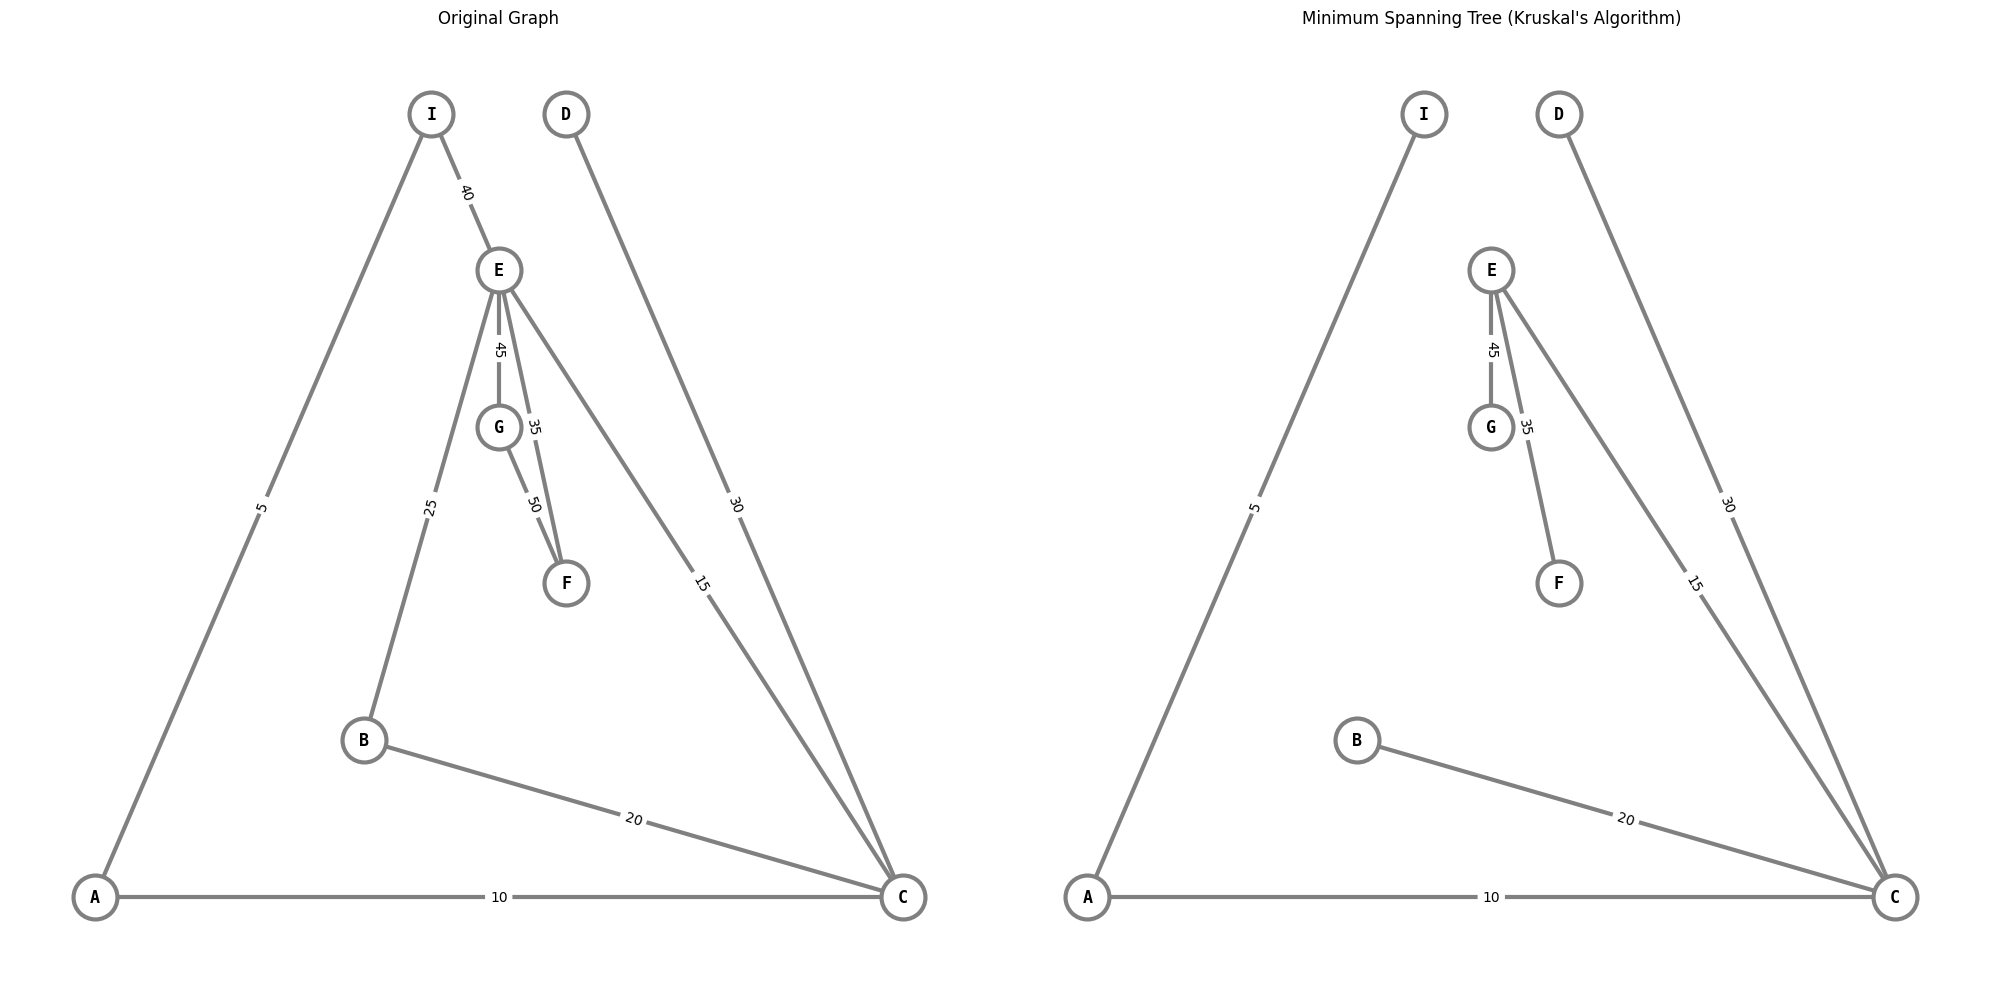

In [194]:
kruskal, kruskal_edge_labels = kruskal_mst(G)
draw_compared_graph(
    kruskal, kruskal_edge_labels, "Minimum Spanning Tree (Kruskal's Algorithm)"
)

In Kruskal's algorithm, the edges of a connected weighted graph are examined one by one in order of increasing weight. At each stage the edge begin examined is added to what will become the minimum spanning tree, provided that this addition does not create a circuit. # type: ignore

1. Initialize $T$ to have all the vertices of $G$ and no edges.
	- $T = [A, B, C, D, E, F, G, I]$
2. Let $E$ be the set of all edges of $G$ and is sorted by weight.
	- $E = [(A, I), (A, C), (C, E), (B, C), (B, E), (C, D), (E, F), (E, I), (E, G), (F, G)]$
3. for ($e \in E$)
	- if addition of $e$ to the edge set of $T$ does not produce a circuit, then add $e$ to the edge set of $T$ and set $m := m + 1$

	next $e$

## Result

<center>

| Iteration Number | Edge Considered | Weight | Action Table |
| :-: | :-: | :-: | :-: |
| $1$ | $(A, I)$ | $5$ | added |
| $2$ | $(A, C)$ | $10$ | added |
| $3$ | $(C, E)$ | $15$ | added |
| $4$ | $(B, C)$ | $20$ | added |
| $5$ | $(B, E)$ | $25$ | not added |
| $6$ | $(C, D)$ | $30$ | added |
| $7$ | $(E, F)$ | $35$ | added |
| $8$ | $(E, I)$ | $40$ | not added |
| $9$ | $(E, G)$ | $45$ | added |
| $10$ | $(F, G)$ | $50$ | not added |

</center>

# Prim's Algorithm
---

In [195]:
def prim_mst(graph: Graph):
    mst = nx.Graph()
    mst.add_node(list(graph.nodes)[0])

    size = len(graph.nodes)

    while len(mst.nodes) < size:
        min_edge = None
        min_weight = float("inf")

        for node in mst.nodes:
            for neighbor, data in graph.adj[node].items():
                if neighbor not in mst.nodes and data["weight"] < min_weight:
                    min_edge = (node, neighbor)
                    min_weight = data["weight"]

        if min_edge:
            mst.add_edge(*min_edge, weight=min_weight)

    return mst, {(a, b): c["weight"] for a, b, c in mst.edges(data=True)}

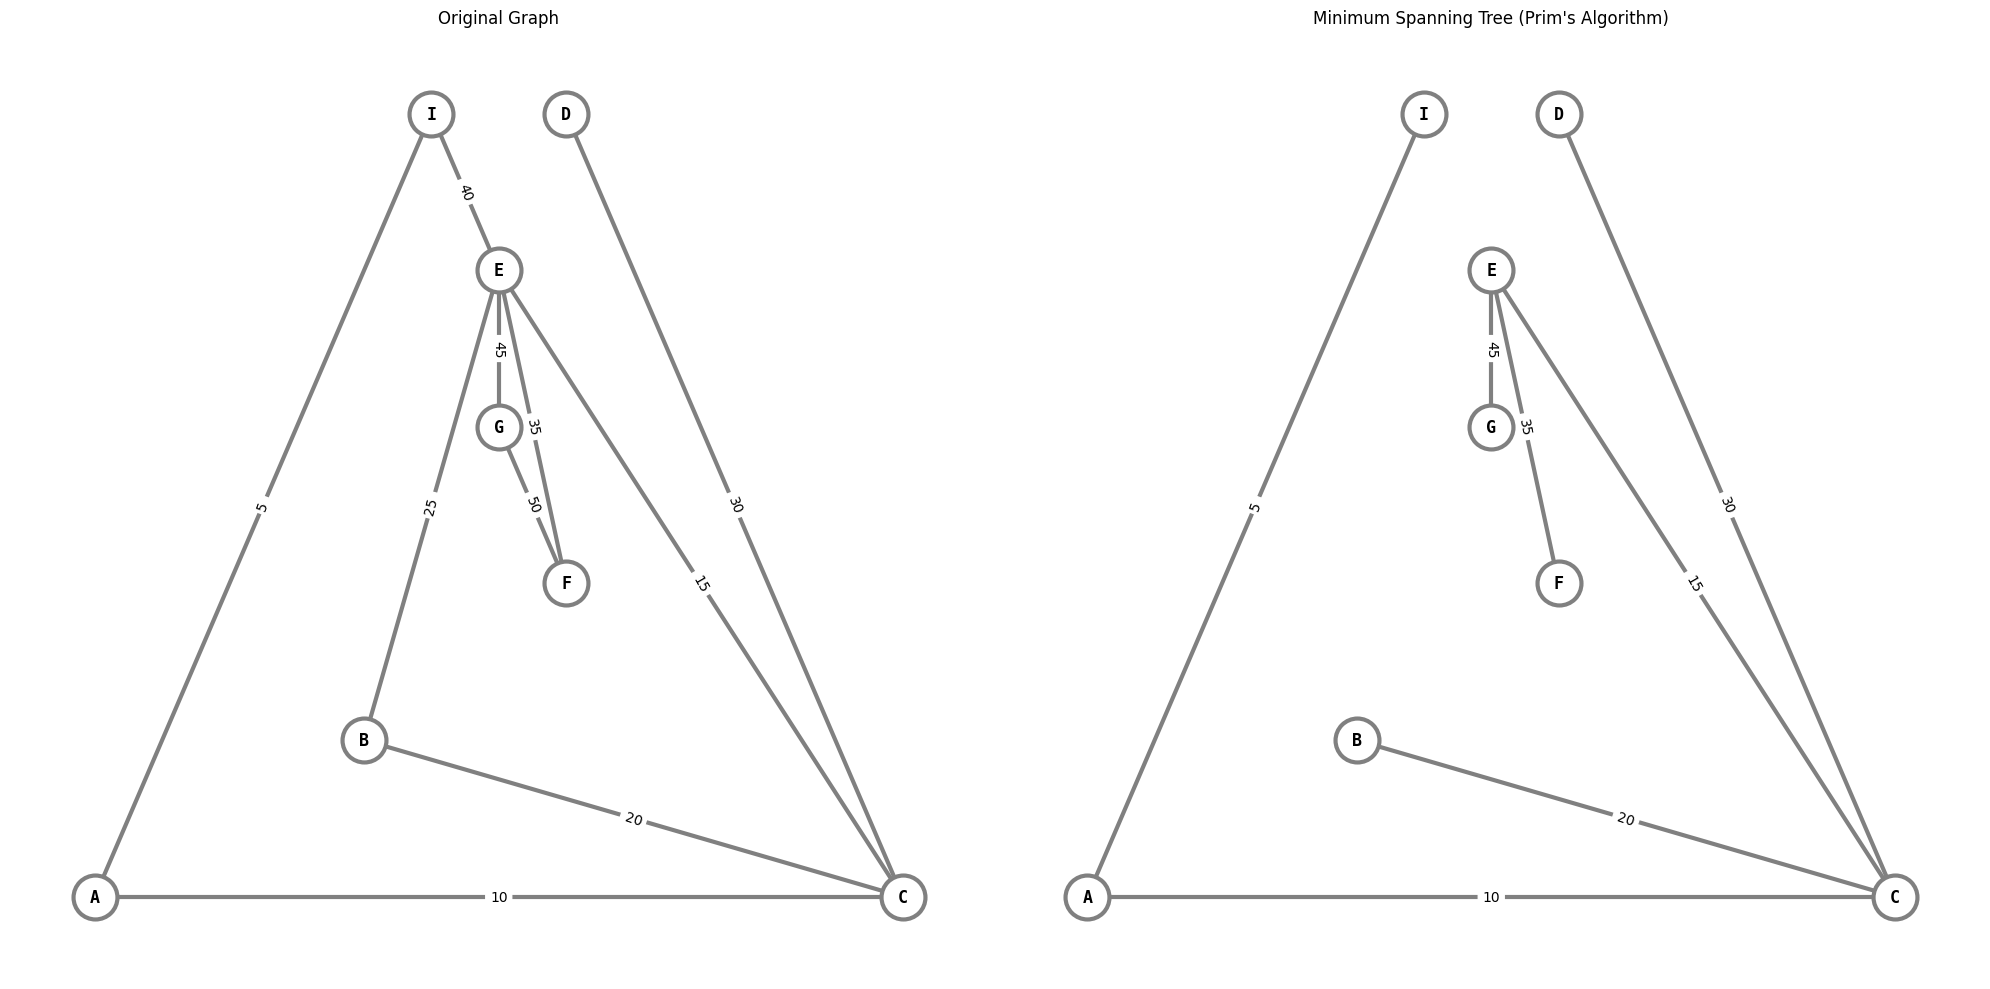

In [196]:
prim, prim_edge_labels = prim_mst(G)
draw_compared_graph(prim, prim_edge_labels, "Minimum Spanning Tree (Prim's Algorithm)")

Prim’s algorithm works differently from Kruskal’s. It builds a minimum spanning tree $T$ by expanding outward in connected links from some vertex. One edge and one vertex are added at each stage. The edge added is the one of least weight that connects the vertices already in $T$ with those not in $T$, and the vertex is the endpoint of this edge that is not already in $T$.

1. Pick a vertex $v$ of $G$ and let $T$ be the graph with one vertex, $v$, and no edges.
2. Let $V$ be the set of all vertices of $G$ except $v$, and let $i = 0$.
3. where ($i < n - 1$) where $n$ is the size of $G$
	- Find an edge $e$ of $G$ such that $(1) \ e$ connects $T$ to one of the vertices in $V$, and $(2) \ e$ has the least weight of all edges connecting $T$ to a vertex in $V$. Let $w$ be the endpoint of $e$ that is in $V$.
	- Add $e$ and $w$ to the edge and vertex sets of $T$.

	end while

## Result

<center>

| Iteration Number | Vertex Added | Edge Added | Weight |
| :-: | :-: | :-: | :-: |
| $0$ | $A$ | | |
| $1$ | $I$ | $(A, I)$ | $5$ |
| $2$ | $C$ | $(A, C)$ | $10$ |
| $3$ | $E$ | $(C, E)$ | $15$ |
| $4$ | $B$ | $(C, B)$ | $20$ |
| $5$ | $D$ | $(C, D)$ | $30$ |
| $6$ | $F$ | $(E, F)$ | $35$ |
| $7$ | $G$ | $(E, G)$ | $45$ |

</center>

# Dijkstra's Shortest Path Algorithm
---

In [197]:
""" Shortest Method
```python
def dijkstra_path(graph: Graph, source: str, target: str):
	shortest_path = nx.dijkstra_path(G, source, target)  # The method...💀

	dijstra = nx.Graph()
	dijstra.add_nodes_from(shortest_path)
	dijstra.add_edges_from(
		[
			(
				shortest_path[i],
				shortest_path[i + 1],
				{
					"weight": graph.edges[(shortest_path[i], shortest_path[i + 1])][
						"weight"
					]
				},
			)
			for i in range(len(shortest_path) - 1)
		]
	)

	return dijstra, {(a, b): c["weight"] for a, b, c in dijstra.edges(data=True)}
```
"""


def dijkstra_mst(graph: Graph, source: str):
    import heapq

    previous = {node: None for node in graph.nodes}
    visited = {node: False for node in graph.nodes}

    distances = {node: float("inf") for node in graph.nodes}
    distances[source] = 0

    queue = [(0, source)]

    while queue:
        current_distance, current_node = heapq.heappop(queue)
        visited[current_node] = True

        if current_distance > distances[current_node]:
            continue

        for neighbor, data in graph.adj[current_node].items():
            if visited[neighbor]:
                continue

            new_distance = current_distance + data["weight"]

            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                previous[neighbor] = current_node
                heapq.heappush(queue, (new_distance, neighbor))

    dijstra = nx.Graph()
    dijstra.add_nodes_from(graph.nodes)
    dijstra.add_edges_from(
        [
            (prev, node, {"weight": graph.edges[(prev, node)]["weight"]})
            for prev, node in previous.items()
            if node is not None
        ]
    )

    return dijstra, {(a, b): c["weight"] for a, b, c in dijstra.edges(data=True)}


def dijkstra_path(graph: Graph, source: str, target: str):
    distances = {node: float("inf") for node in graph.nodes}
    distances[source] = 0

    previous = {node: None for node in graph.nodes}
    visited = set()

    while visited != set(graph.nodes):
        current_node = min(
            (node for node in graph.nodes if node not in visited),
            key=lambda x: distances[x],
        )
        visited.add(current_node)

        if current_node == target:
            break

        for neighbor, data in graph.adj[current_node].items():
            new_distance = distances[current_node] + data["weight"]
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                previous[neighbor] = current_node

    shortest_path = []
    current_node = target

    while current_node is not None:
        shortest_path.append(current_node)
        current_node = previous[current_node]

    shortest_path.reverse()

    dijstra = nx.Graph()
    dijstra.add_nodes_from(shortest_path)
    dijstra.add_edges_from(
        [
            (
                shortest_path[i],
                shortest_path[i + 1],
                {
                    "weight": graph.edges[(shortest_path[i], shortest_path[i + 1])][
                        "weight"
                    ]
                },
            )
            for i in range(len(shortest_path) - 1)
        ]
    )

    return dijstra, {(a, b): c["weight"] for a, b, c in dijstra.edges(data=True)}

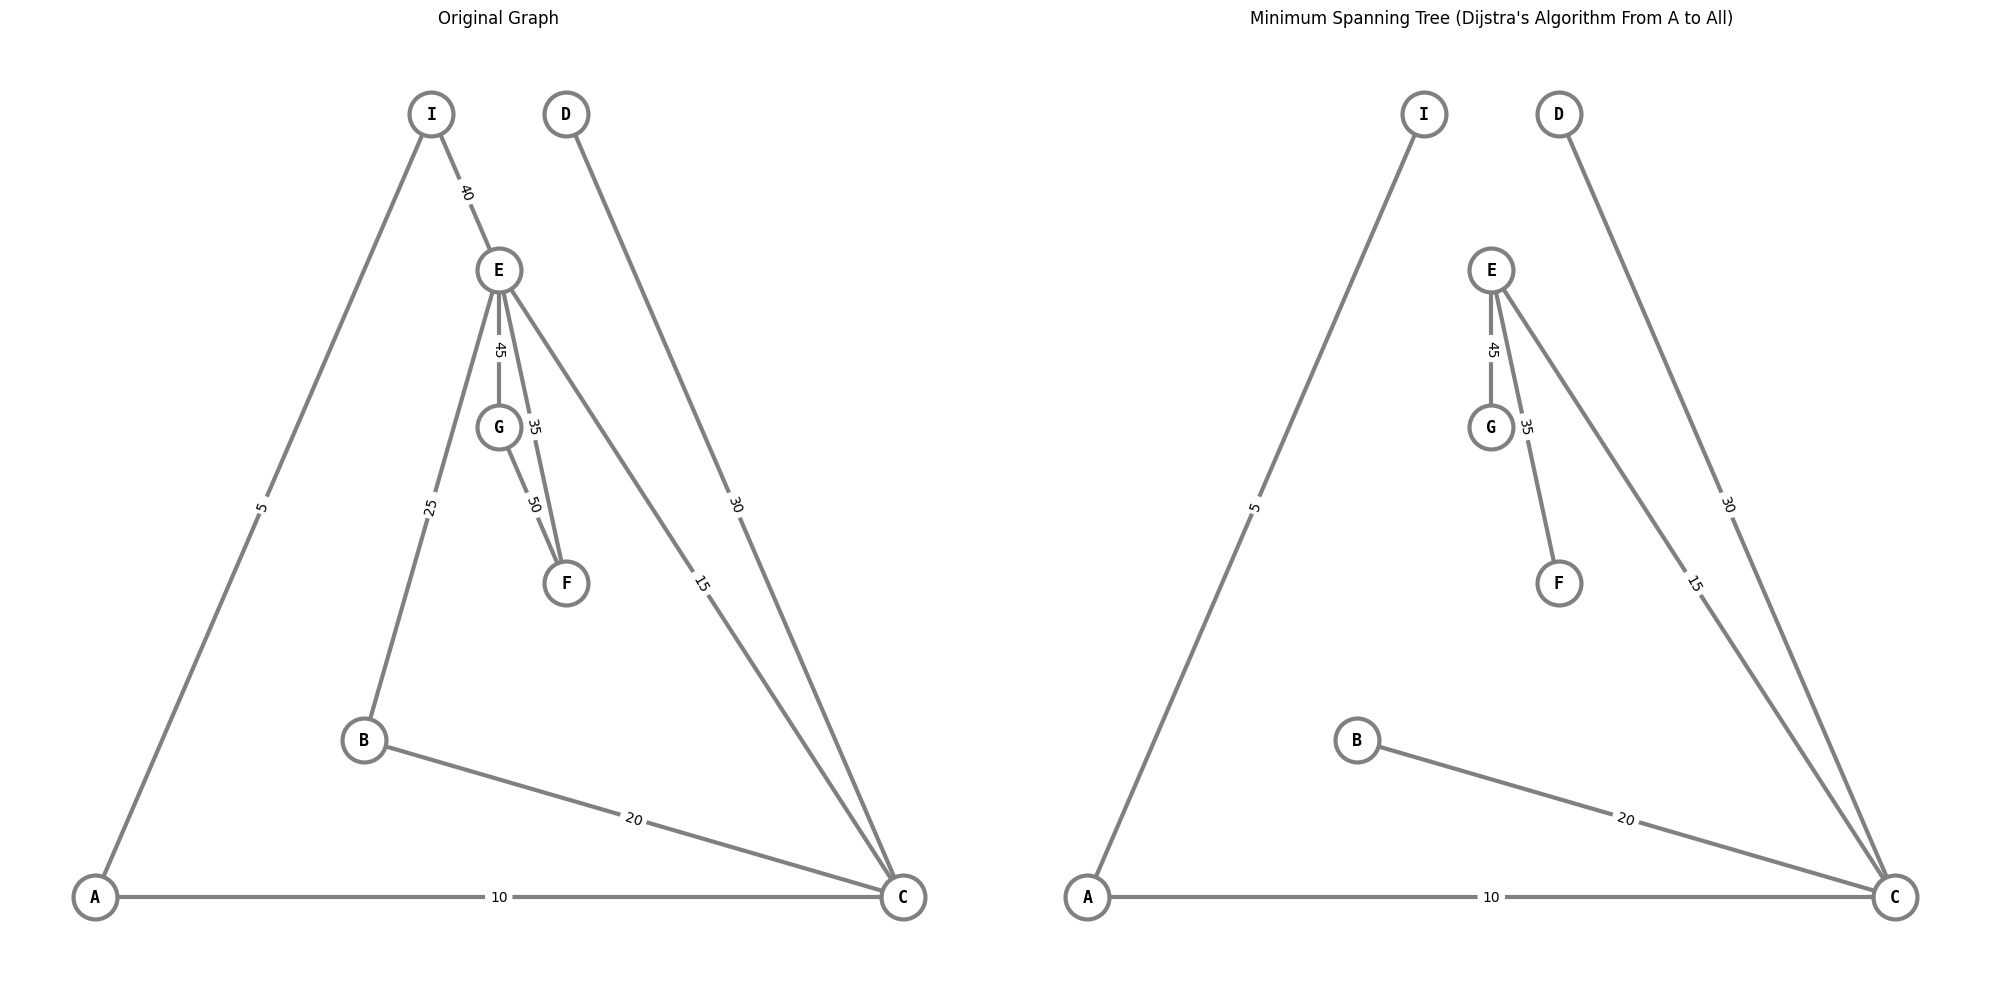

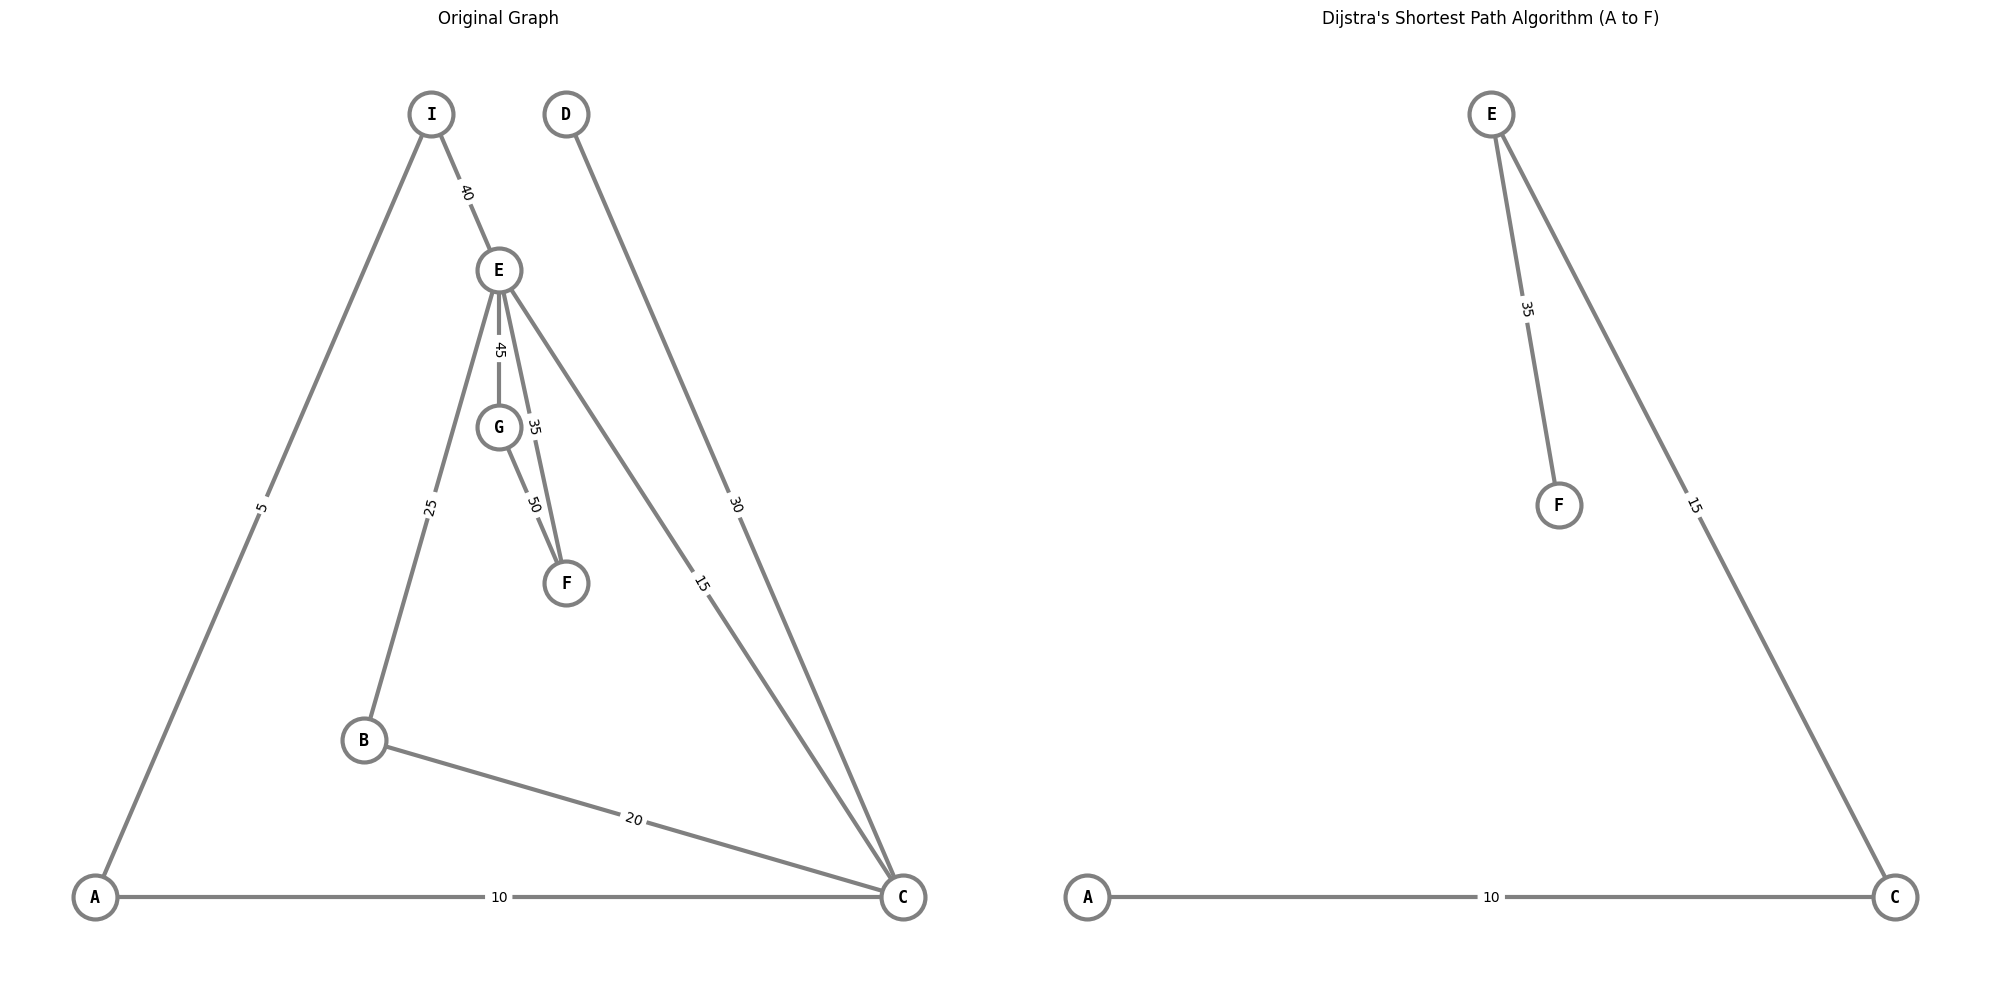

In [198]:
dijstra, dijstra_edge_labels = dijkstra_mst(G, source="A")
draw_compared_graph(
    dijstra,
    dijstra_edge_labels,
    "Minimum Spanning Tree (Dijstra's Algorithm From A to All)",
)

dijstra, dijstra_edge_labels = dijkstra_path(G, source="A", target="F")
draw_compared_graph(
    dijstra, dijstra_edge_labels, "Dijstra's Shortest Path Algorithm (A to F)"
)

Dijkstra's Shortest Path Algorithm is a classic algorithm used to find the shortest path between nodes in a graph, which can represent, for example, road networks. It was conceived by Dutch computer scientist Edsger W. Dijkstra in $1956$ and published in $1959$. The algorithm works efficiently on graphs with non-negative weights and is widely used in routing and navigation systems.

1. Initialize $T$ to be the graph with vertex $a$ and no edges. Let $V(T)$ be the set of vertices of $T$, and let $E(T)$ be the set of edges of $T$.

2. Let $L(a) = 0$, and for all vertices in $G$ except $a$, let $L(u) = \infty$

	*[The number $L(x)$ is called the label of $x$.]*

3. Initialize $v$ to equal $a$ and $F$ to be ${a}$.
	*[The symbol $v$ is used to denote the vertex most recently added to $T$.]*

4. while ($z \not\in V(T)$)
	- $F := (F - {v}) \cup$ {vertices that are adjacent to $v$ and are not in $V(T)$}
	  *[The set $F$ is called the fringe. Each time a vertex is added to $T$, it is removed from the fringe and the vertices adjacent to it are added to the fringe if they are not already in the fringe or the tree $T$]*
	- For each vertex $u$ that is adjacent to $v$ and is not in $V(T)$,
	  if $L(v) + w(v, u) < L(u)$ then

	  $
	  \begin{align}
		L(u) & := L(v) + w(v, u) \\
		D(u) & := v
	  \end{align}
	  $

	  *[Note that adding $v$ to $T$ does not affect the labels of any vertices in the fringe $F$ except those adjacent to $v$. Also, when $L(u)$ is changed to a smaller value, the notation $D(u)$ is introduced to keep track of which vertex in $T$ gave rise to the smaller value.]*
	- Find a vertex $x$ in $F$ with the smallest label
	  Add vertex $x$ to $V(T)$, and add edge {$D(x), x$} to $E(T)$

	  $v := x$ *[This statement sets up to notation for the next iteration of the loop.]*

	end while

## Result

<center>

| Step | $V(T)$ | $E(T)$ | $F$ | $L(A)$ | $L(B)$ | $L(C)$ | $L(D)$ | $L(E)$ | $L(F)$ | $L(G)$ | $L(I)$ |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-:| :-: |
| $0$ | {$A$} | $\theta$ | {$A$} | $0$ | $\infty$ | $\infty$| $\infty$| $\infty$ | $\infty$ | $\infty$ | $\infty$ |
| $1$ | {$A$} | $\theta$ | {$I, C$} | $0$ | $\infty$ | $10$ | $\infty$| $\infty$ | $\infty$ | $\infty$ | $5$ |
| $2$ | {$A, I$} | {$(A, I)$} | {$E, C$} | $0$ | $\infty$ | $10$ | $\infty$| $45$ | $\infty$ | $\infty$ | $5$ |
| $3$ | {$A, I, C$} | {$(A, I), (A, C)$} | {$B, D, E$} | $0$ | $30$ | $10$ | $40$| $25$ | $\infty$ | $\infty$ | $5$ |
| $4$ | {$A, I, C, E$} | {$(A, I), (A, C), (C, E)$} | {$B, G, F$} | $0$ | $50$ | $10$ | $40$| $25$ | $60$ | $70$ | $5$ |
| $5$ | {$A, I, C, E, F$} | {$(A, I), (A, C), (C, E), (E, F)$} | | | | | | | | |

</center>

Therefore, the shortest path from $A$ to $F$ is {$(A, C), (C, E), (E, F)$} with a length of $L(z) = 60$. To accomplish this we have to apply the backtrace method where we ignore the already existing vertex.

This method can be applied to the Minimum Spanning Tree, with no target with the purpose of just visiting every vertex and.